#### read dataset

In [41]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os

In [42]:
df = pd.read_csv("dataset\stroke.csv")
print("Dataset Loaded!")
df = df.drop("id", axis=1)
df.head()

Dataset Loaded!


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [44]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [45]:
df = df.dropna()
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [47]:
# from sklearn.preprocessing import LabelEncoder

# encoders = {}
# for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
#     le = LabelEncoder()
#     le.fit(df[col])
#     encoders[col] = le

# fitur_train = df.drop('stroke', axis=1).columns.tolist()

# # Simpan ini agar nanti bisa dipakai di API
# import pickle
# with open("models/encoders.pkl", "wb") as f:
#     pickle.dump({"columns": fitur_train, "encoders": encoders}, f)

# for column in df.columns:
#     if df[column].dtype == 'object':
#         le = LabelEncoder()
#         df[column] = le.fit_transform(df[column])
# df.head()

In [48]:
# skew_values = df.skew()
# print("Skewness tiap kolom:")
# print(skew_values)

In [49]:
df["stroke"].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

#### var inden dan depen

In [50]:
x = df.drop("stroke", axis=1)
y = df.iloc[:, -1]


y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [51]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


#### split data test dan train

In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# from imblearn.over_sampling import SMOTE

# # Split test set seimbang
# kelas_0 = df[df['stroke'] == 0]
# kelas_1 = df[df['stroke'] == 1]

# n_test = 50
# test_0 = kelas_0.sample(n=n_test, random_state=42)
# test_1 = kelas_1.sample(n=n_test, random_state=42)
# test_set = pd.concat([test_0, test_1])

# train_set = df.drop(test_set.index)

# # Pisahkan fitur dan stroke
# x_train = train_set.drop('stroke', axis=1)
# y_train = train_set['stroke']
# x_test = test_set.drop('stroke', axis=1)
# y_test = test_set['stroke']

# # SMOTE pada train set
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [53]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in x_train.columns:
    if x_train[col].dtype == "object":
        le = LabelEncoder()

        # Fit hanya TRAIN
        x_train[col] = le.fit_transform(x_train[col])

        # Test hanya TRANSFORM
        x_test[col] = le.transform(x_test[col])

        encoders[col] = le


# Simpan encoder untuk API
fitur_train = x_train.columns.tolist()

with open("models/encoders.pkl", "wb") as f:
    pickle.dump({"columns": fitur_train, "encoders": encoders}, f)

print("\nEncoder berhasil disimpan!")



Encoder berhasil disimpan!


In [54]:
from imblearn.combine import SMOTEENN
x_train_res, y_train_res = SMOTEENN().fit_resample(x_train, y_train)


In [55]:
y_test

4020    0
2170    0
2822    0
4759    0
1437    0
       ..
2819    0
1478    0
3704    0
762     0
5068    0
Name: stroke, Length: 982, dtype: int64

In [56]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1473,1,49.0,1,0,1,0,1,139.43,40.2,1
4539,0,63.0,0,0,1,3,0,203.87,26.4,2
953,1,6.0,0,0,0,4,0,92.98,18.9,0
2563,1,57.0,0,0,1,2,1,90.40,26.5,2
2426,0,7.0,0,0,0,4,1,79.58,15.5,0


In [57]:
x_train_res

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,63.000000,0,0,1,3,0,203.870000,26.400000,2
1,1,6.000000,0,0,0,4,0,92.980000,18.900000,0
2,0,7.000000,0,0,0,4,1,79.580000,15.500000,0
3,0,76.000000,0,0,1,2,0,97.900000,31.300000,1
4,0,65.000000,0,0,1,0,1,84.470000,52.700000,3
...,...,...,...,...,...,...,...,...,...,...
6398,0,60.689013,0,0,1,1,1,112.106275,36.708053,2
6399,0,79.000000,0,0,0,1,1,97.785389,21.652798,2
6400,0,76.478699,0,0,0,2,1,137.811821,27.554377,1
6401,0,56.226889,0,0,1,2,0,187.917622,39.061357,1


#### modeling

In [58]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(x_train_res, y_train_res)

print("Training selesai!")

Training selesai!


#### evaluasi


=== EVALUASI MODEL XGBOOST ===
Akurasi: 0.8329938900203666

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       940
           1       0.11      0.43      0.18        42

    accuracy                           0.83       982
   macro avg       0.54      0.64      0.54       982
weighted avg       0.93      0.83      0.88       982



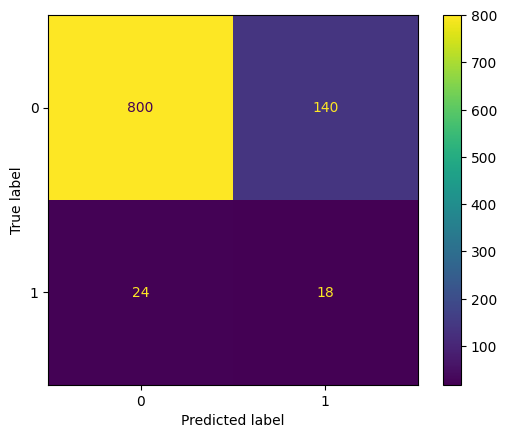

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(x_test)

print("\n=== EVALUASI MODEL XGBOOST ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


#### simpan pohon ke pdf

#### simpan model

In [60]:

with open('models/xgboost.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("model dan scaler berhasil disimpan")

model dan scaler berhasil disimpan
